### Exploração dos dados

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

base_cobranca = pd.read_csv('data/base_cobranca.tsv', delimiter="\t")
base_cobranca.head()

/tmp/ipykernel_1205438/4152663208.py:5: DtypeWarning: Columns (12,50) have mixed types. Specify dtype option on import or set low_memory=False.
  base_cobranca = pd.read_csv('data/base_cobranca.tsv', delimiter="\t")


,id,documento,mes_pagamento,dias_atraso,segmento_veiculo,saldo_vencido,pagamento,divida_restante,per_pago,GENERO,...,VAR_306,VAR_307,VAR_308,VAR_309,VAR_310,VAR_311,VAR_312,VAR_313,VAR_314,VAR_315
0,0x117651,0x722945,202301,18,leves,1445.37,0.00,1445.37,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0x80136d,0x7fa1e8,202301,28,motos,426.84,426.84,0.00,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0x839c27,0x724e31,202301,30,leves,1381.98,1381.98,0.00,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0x7675af,0x827ea9,202210,22,leves,1299.22,1299.22,0.00,1.0,M,...,PROXIMO,MUITO LONGE,MUITO LONGE,0.0,1.0,RURAL,CENTRO-OESTE,NaN,D,NaN
4,0x52fa00,0x2772b2,202210,17,motos,493.42,0.00,493.42,0.0,F,...,MEDIO,PROXIMO,PROXIMO,1.0,1.0,URBANO,NORDESTE,0.0,B,1.0


In [2]:
base_cobranca.shape

(300000, 328)

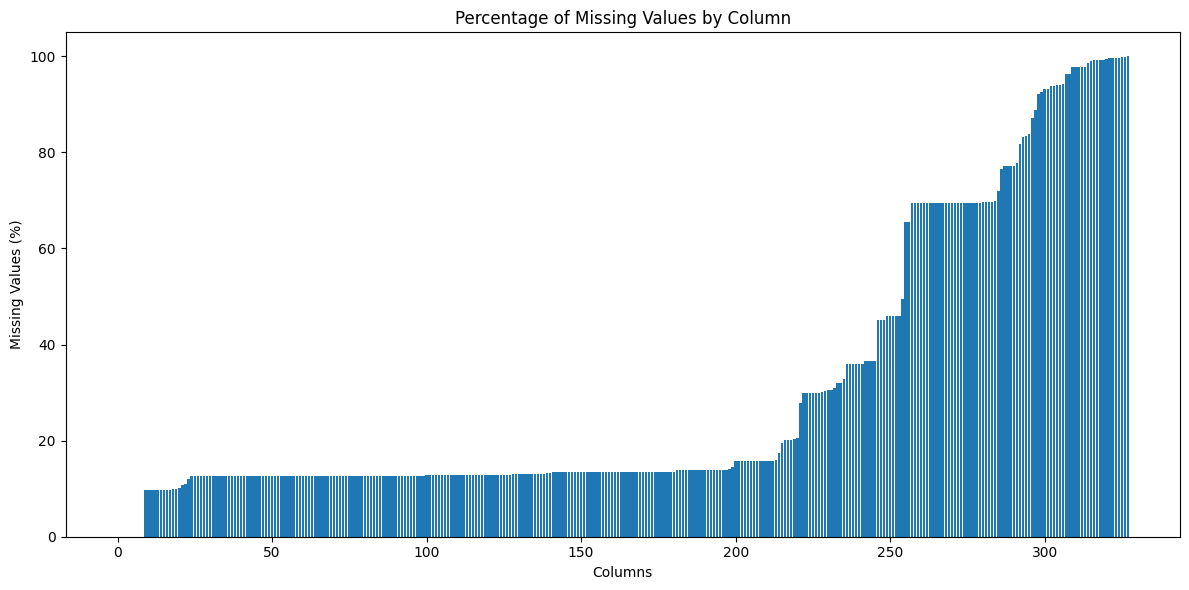

In [7]:
# Calculate missing values percentage
missing_values = base_cobranca.isnull().mean().sort_values() * 100

# Create bar plot
plt.figure(figsize=(12, 6))
plt.bar(range(len(missing_values)), missing_values)

# Customize plot
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values (%)')
#plt.xticks(range(len(missing_values)), missing_values.index, rotation=90)

# Adjust layout to prevent label cutoff
plt.tight_layout()

In [30]:
print(f'Months range in the table: {base_cobranca.mes_pagamento.min()} to {base_cobranca.mes_pagamento.max()}')

Months range in the table: 202203 to 202301


In [48]:
print('Recurring documents: \n', base_cobranca['documento'].value_counts().head())

Recurring documents: 
 documento
0x74b012    9
0x1bf8c0    8
0x67d24a    8
0x606c45    8
0x7a08e8    8
Name: count, dtype: int64


In [45]:
base_cobranca[base_cobranca['documento']=='0x74b012'].loc[:,:'per_pago']

,id,documento,mes_pagamento,dias_atraso,segmento_veiculo,saldo_vencido,pagamento,divida_restante,per_pago
227093,0x5debc7,0x74b012,202205,66,leves,2055.6,765.84,1289.76,0.372563
237443,0x5debc7,0x74b012,202204,67,leves,2055.6,767.33,1288.27,0.373288
254143,0x5debc7,0x74b012,202209,69,leves,2055.6,650.94,1404.66,0.316667
255298,0x5debc7,0x74b012,202208,69,leves,2055.6,769.56,1286.04,0.374372
264557,0x5debc7,0x74b012,202211,69,leves,2055.6,650.94,1404.66,0.316667
266742,0x5debc7,0x74b012,202210,69,leves,2055.6,769.56,1286.04,0.374372
269869,0x5debc7,0x74b012,202206,69,leves,2055.6,767.33,1288.27,0.373288
272505,0x5debc7,0x74b012,202207,68,leves,2055.6,768.82,1286.78,0.374012
275235,0x5debc7,0x74b012,202212,68,leves,2055.6,0.00,2055.60,0.000000


In [50]:
base_cobranca["dias_atraso"].value_counts().sort_index()

dias_atraso
8     7152
9     6936
10    6386
11    6158
12    5724
      ... 
86    2465
87    2284
88    2242
89    1993
90    2164
Name: count, Length: 83, dtype: int64

### Correlações

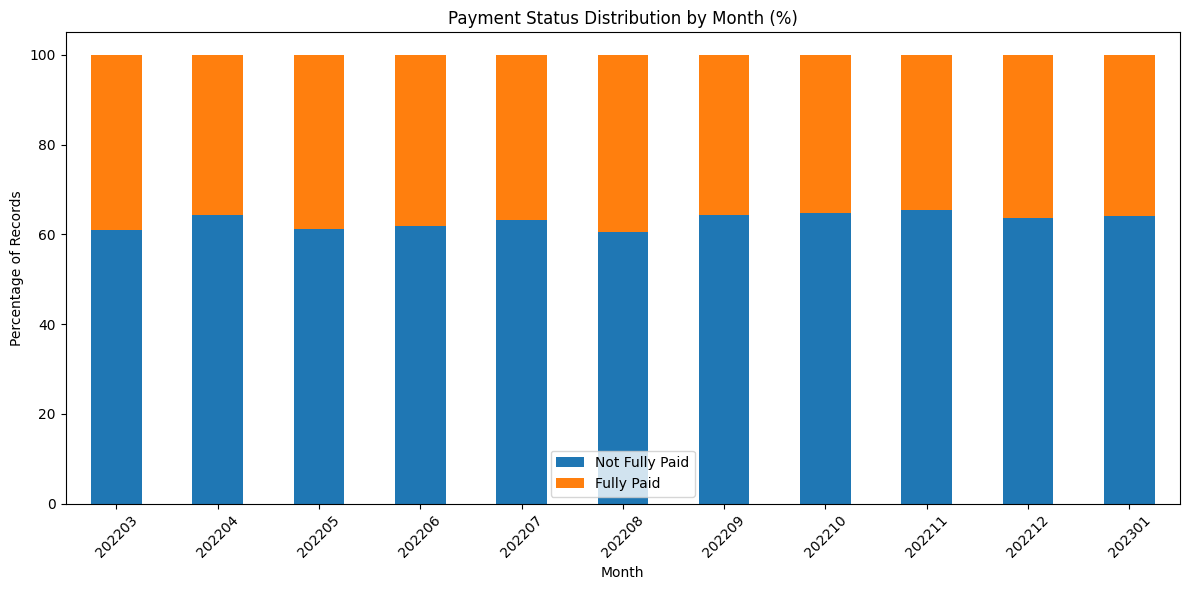

In [56]:
# Create binary paid indicator (1 if fully paid, 0 if not)
base_cobranca['paid_status'] = (base_cobranca['per_pago'] == 1.0).astype(int)

# Calculate percentage of paid vs unpaid per month
monthly_payment_status = base_cobranca.groupby(['mes_pagamento', 'paid_status']).size().unstack()
monthly_payment_status_pct = monthly_payment_status.div(monthly_payment_status.sum(axis=1), axis=0) * 100

# Create stacked bar plot
ax = monthly_payment_status_pct.plot(kind='bar', stacked=True, figsize=(12,6))

# Customize plot
plt.title('Payment Status Distribution by Month (%)')
plt.xlabel('Month') 
plt.ylabel('Percentage of Records')
plt.legend(['Not Fully Paid', 'Fully Paid'])
plt.xticks(rotation=45)
plt.tight_layout()


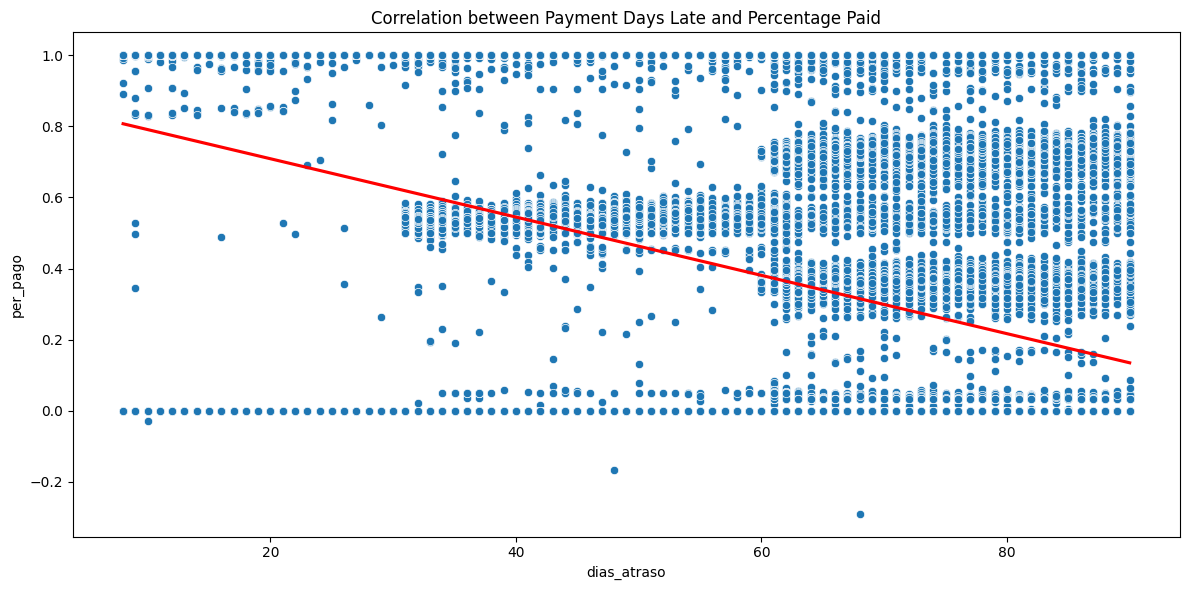

In [58]:
# Create scatter plot of dias_atraso vs per_pago
plt.figure(figsize=(12,6))
sns.scatterplot(data=base_cobranca, x='dias_atraso', y='per_pago', alpha=0.5)

# Customize plot
plt.title('Correlation between Payment Days Late and Percentage Paid')
plt.xlabel('Days Late (dias_atraso)')
plt.ylabel('Percentage Paid (per_pago)')

# Add trend line
sns.regplot(data=base_cobranca, x='dias_atraso', y='per_pago', scatter=False, color='red')

plt.tight_layout()


segmento_veiculo
leves      213667
motos       86321
pesados        12
Name: count, dtype: int64


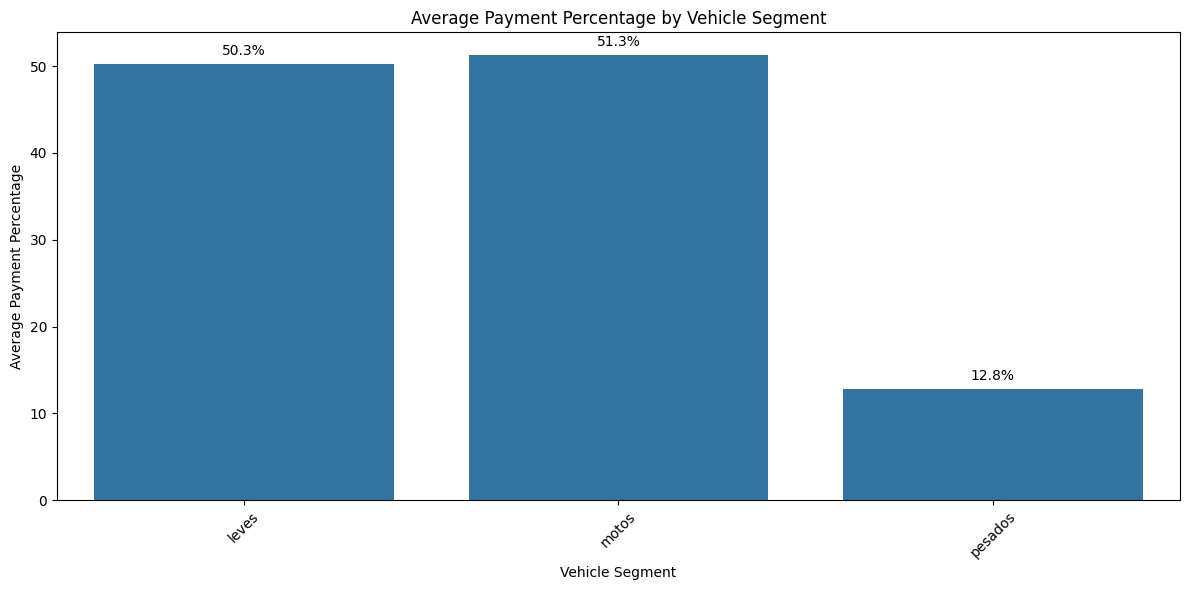

In [61]:
# Calculate average percentage paid by vehicle segment
segment_payment = base_cobranca.groupby('segmento_veiculo')['per_pago'].mean() * 100
print(base_cobranca['segmento_veiculo'].value_counts())
# Create bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=segment_payment.index, y=segment_payment.values)

# Customize plot
plt.title('Average Payment Percentage by Vehicle Segment')
plt.xlabel('Vehicle Segment')
plt.ylabel('Average Payment Percentage')
plt.xticks(rotation=45)

# Add value labels on top of bars
for i, v in enumerate(segment_payment.values):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center')

plt.tight_layout()


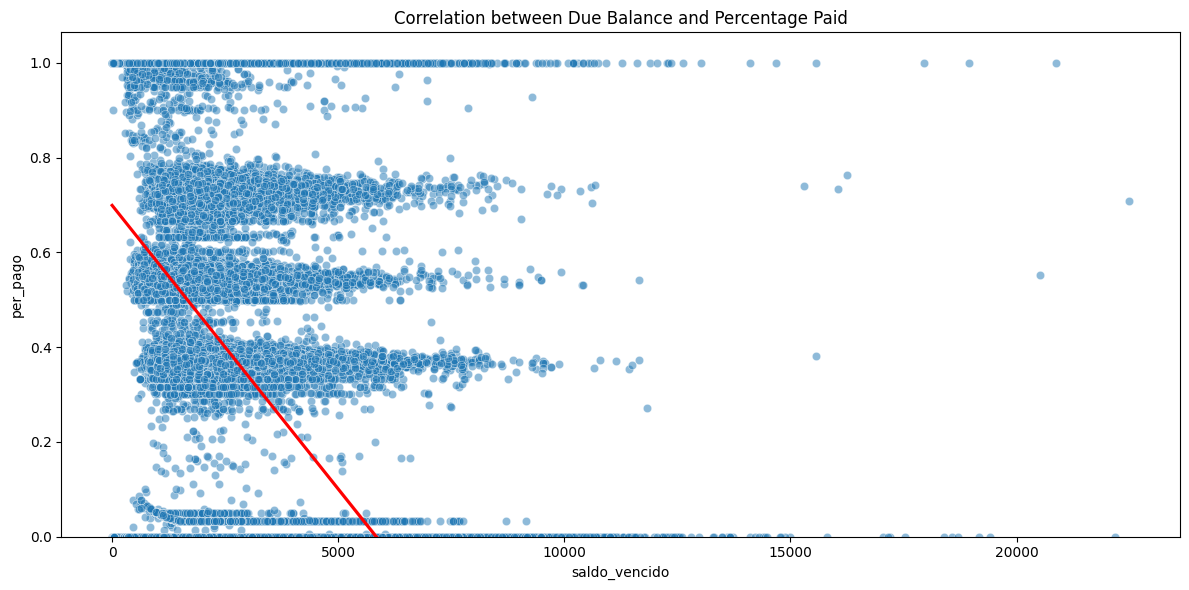

In [12]:
# Create scatter plot of saldo_vencido vs per_pago
plt.figure(figsize=(12,6))
sns.scatterplot(data=base_cobranca, x='saldo_vencido', y='per_pago', alpha=0.5)

# Customize plot
plt.title('Correlation between Due Balance and Percentage Paid')
plt.xlabel('Due Balance (saldo_vencido)')
plt.ylabel('Percentage Paid (per_pago)')
plt.ylim(bottom=0)
# Add trend line
sns.regplot(data=base_cobranca, x='saldo_vencido', y='per_pago', scatter=False, color='red')

plt.tight_layout()


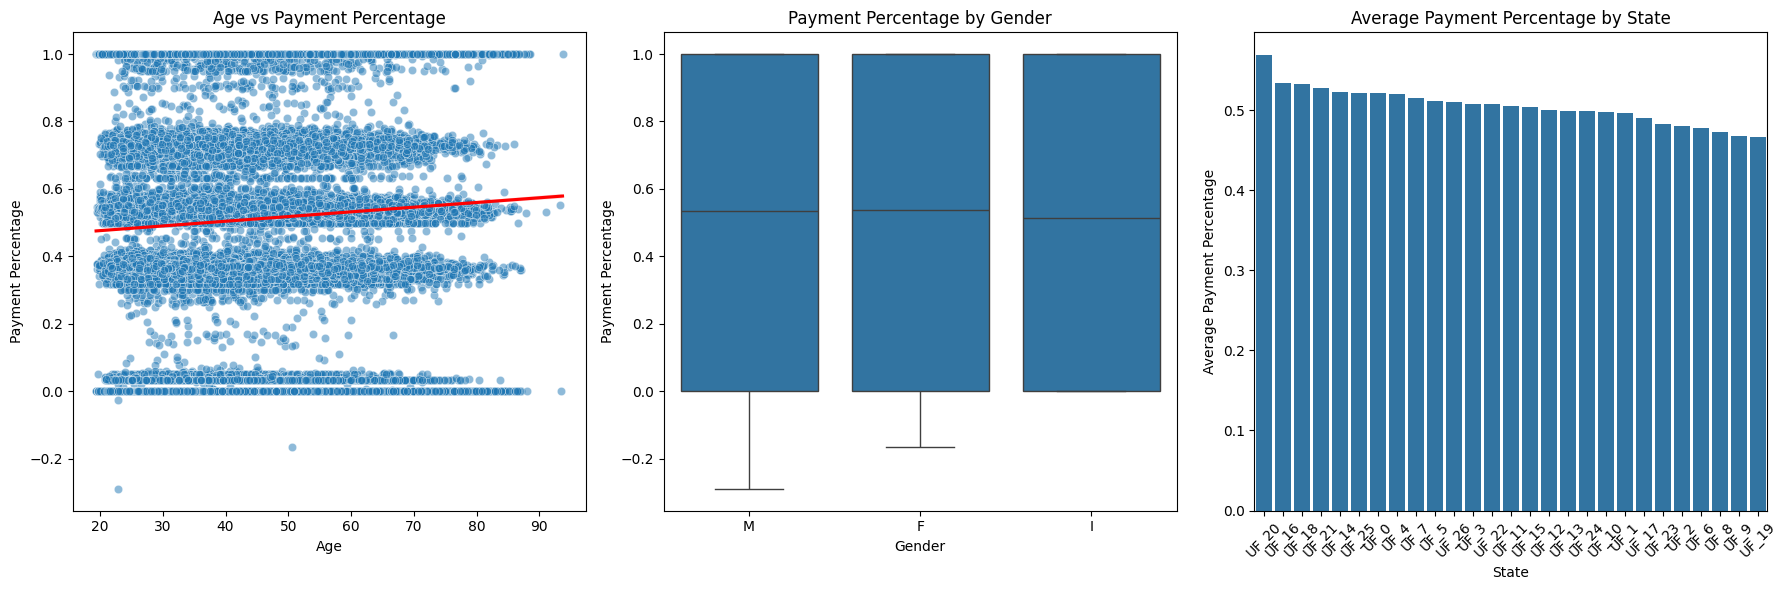

In [15]:
# Create subplots for age, gender and UF analysis
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Age vs Payment Percentage
sns.scatterplot(data=base_cobranca, x='IDADE', y='per_pago', alpha=0.5, ax=ax1)
sns.regplot(data=base_cobranca, x='IDADE', y='per_pago', scatter=False, color='red', ax=ax1)
ax1.set_title('Age vs Payment Percentage')
ax1.set_xlabel('Age')
ax1.set_ylabel('Payment Percentage')

# Gender vs Payment Percentage
sns.boxplot(data=base_cobranca, x='GENERO', y='per_pago', ax=ax2)
ax2.set_title('Payment Percentage by Gender')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Payment Percentage')

# State (UF) vs Payment Percentage
avg_payment_by_uf = base_cobranca.groupby('UF')['per_pago'].mean().sort_values(ascending=False)
sns.barplot(x=avg_payment_by_uf.index, y=avg_payment_by_uf.values, ax=ax3)
ax3.set_title('Average Payment Percentage by State')
ax3.set_xlabel('State')
ax3.set_ylabel('Average Payment Percentage')
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()


In [ ]:
# Calculate percentage of null values for each column
null_percentages = base_cobranca.isnull().mean() * 100

# Get columns with more than 40% null values
cols_to_drop = null_percentages[null_percentages > 40].index

# Print info about columns being dropped
print(f"Dropping {len(cols_to_drop)} columns with >40% null values:")
for col in cols_to_drop:
    print(f"{col}: {null_percentages[col]:.1f}% null")

# Drop the columns
base_cobranca = base_cobranca.drop(columns=cols_to_drop)

print(f"\nShape after dropping high-null columns: {base_cobranca.shape}")


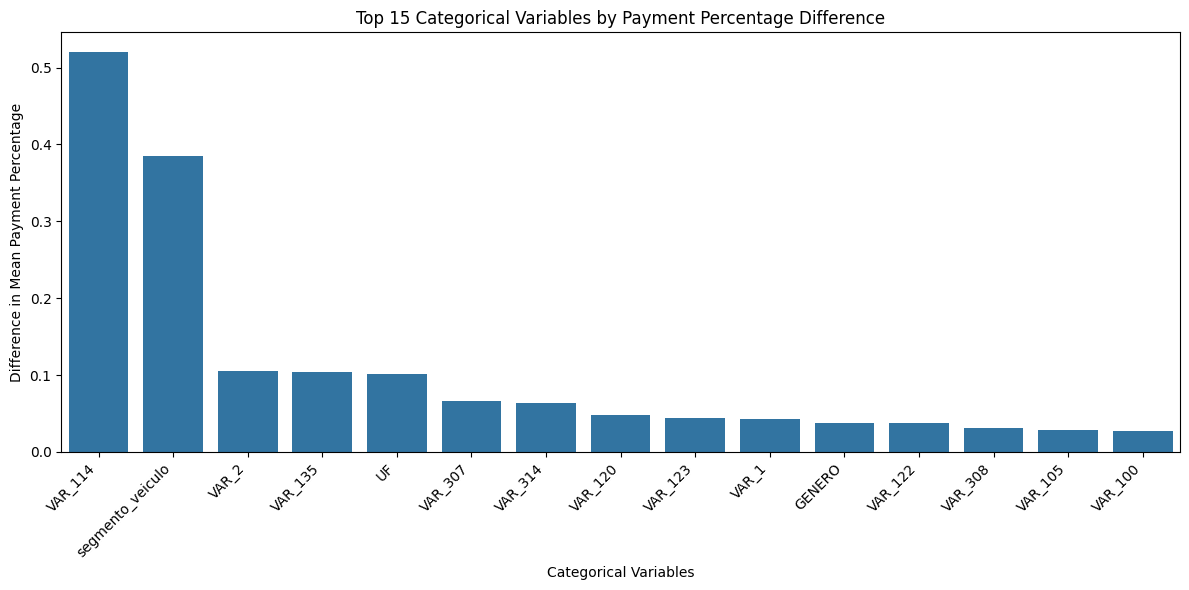

In [7]:
# Calculate mean per_pago for each unique value in categorical columns
categorical_cols = base_cobranca.select_dtypes(include=['object']).columns
mean_diffs = {}

for col in categorical_cols:
    # Skip columns with too many unique values or all missing values
    if base_cobranca[col].nunique() < 50 and base_cobranca[col].notna().any():
        # Calculate mean per_pago for each category
        means = base_cobranca.groupby(col)['per_pago'].mean()
        # Calculate difference between max and min means
        mean_diff = means.max() - means.min()
        mean_diffs[col] = mean_diff

# Sort columns by mean difference
sorted_cols = pd.Series(mean_diffs).sort_values(ascending=False)

# Plot top 15 categorical variables with highest mean differences
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_cols.head(15).index, y=sorted_cols.head(15).values)

plt.title('Top 15 Categorical Variables by Payment Percentage Difference')
plt.xlabel('Categorical Variables')
plt.ylabel('Difference in Mean Payment Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


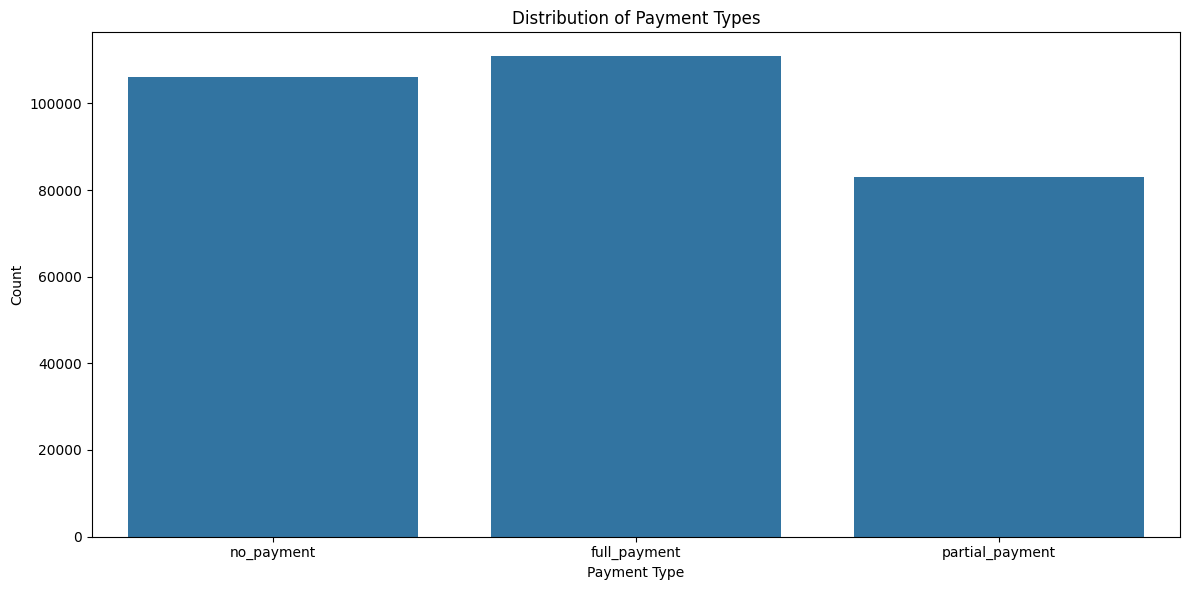

In [11]:
base_cobranca['flag'] = base_cobranca['per_pago'].apply(lambda x: 'full_payment' if x == 1 else ('no_payment' if x == 0 else 'partial_payment'))

# Create countplot of payment flags
plt.figure(figsize=(12, 6))
sns.countplot(data=base_cobranca, x='flag')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()

In [13]:
import pandas as pd

df = pd.read_csv('output/classification_predictions_20250406_114904/classification_predictions.csv')


/tmp/ipykernel_1205438/4285819305.py:3: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('output/classification_predictions_20250406_114904/classification_predictions.csv')


In [16]:
from sklearn.metrics import classification_report

df = df[df['mes_pagamento']>=202210]
# Generate and print classification report
print("Classification Report:")
print(classification_report(df['actual_class'], df['predicted_class']))

# Calculate metrics per class
report = classification_report(df['actual_class'], df['predicted_class'], output_dict=True)

# Print metrics in a more readable format
print("\nDetailed Metrics by Class:")
print("\nFull Payment:")
print(f"Precision: {report['full_payment']['precision']:.3f}")
print(f"Recall: {report['full_payment']['recall']:.3f}")
print(f"F1-Score: {report['full_payment']['f1-score']:.3f}")

print("\nPartial Payment:") 
print(f"Precision: {report['partial_payment']['precision']:.3f}")
print(f"Recall: {report['partial_payment']['recall']:.3f}")
print(f"F1-Score: {report['partial_payment']['f1-score']:.3f}")

print("\nNo Payment:")
print(f"Precision: {report['no_payment']['precision']:.3f}")
print(f"Recall: {report['no_payment']['recall']:.3f}") 
print(f"F1-Score: {report['no_payment']['f1-score']:.3f}")

print(f"\nOverall Accuracy: {report['accuracy']:.3f}")

Classification Report:
                 precision    recall  f1-score   support

   full_payment       0.76      0.73      0.75    110875
     no_payment       0.55      0.37      0.44    106054
partial_payment       0.48      0.70      0.57     83071

       accuracy                           0.60    300000
      macro avg       0.60      0.60      0.59    300000
   weighted avg       0.61      0.60      0.59    300000


Detailed Metrics by Class:

Full Payment:
Precision: 0.762
Recall: 0.729
F1-Score: 0.745

Partial Payment:
Precision: 0.480
Recall: 0.705
F1-Score: 0.571

No Payment:
Precision: 0.550
Recall: 0.373
F1-Score: 0.445

Overall Accuracy: 0.597


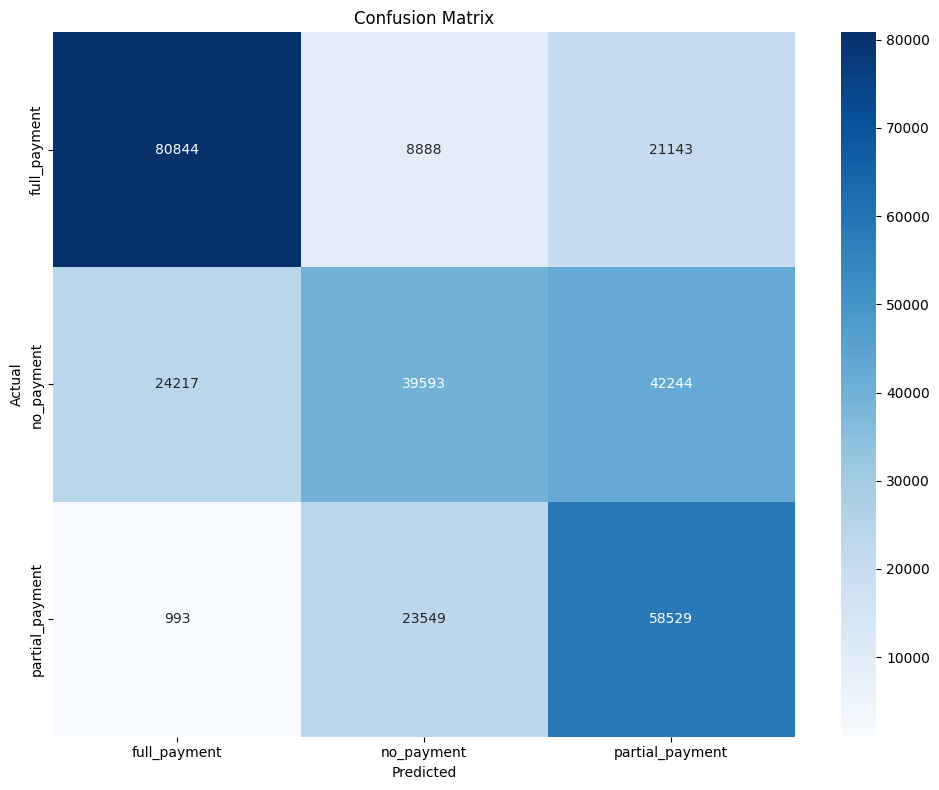

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(df['actual_class'], df['predicted_class'])

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['full_payment', 'no_payment', 'partial_payment'],
            yticklabels=['full_payment', 'no_payment', 'partial_payment'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()
